In this Ntbk, I have trained Loan Approval Prediction models using different ML algos and analyzed which works better. Here are some of the step:

- Data import
- EDA
  - Quick statistics
  - Preprocessing
  - Data cleaning
  - Visualization
- Model Trainin
- Model Testing
- Dumping the final model


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pickle as pkl
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [21]:
df = pd.read_csv('/content/Train_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [24]:
item = (df.dtypes == 'object')
print("Categorical variables:",len(list(item[item].index)))

Categorical variables: 8


In [25]:
# Dropping Loan_ID column
df.drop(['Loan_ID'],axis=1,inplace=True)

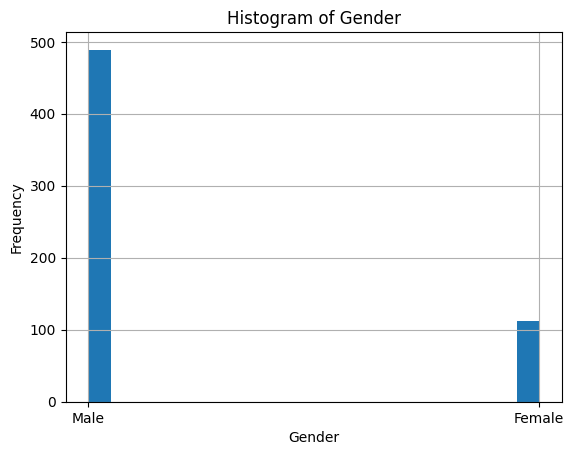

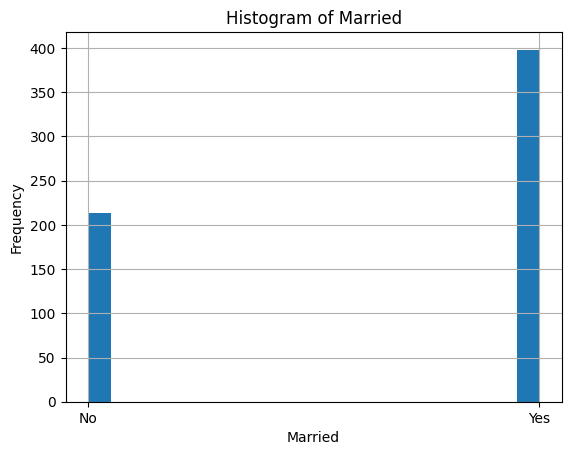

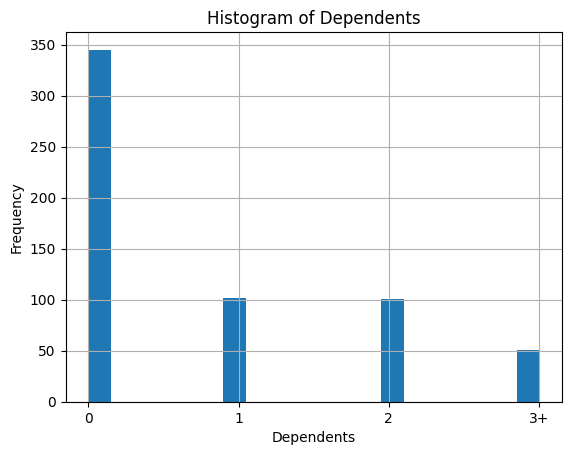

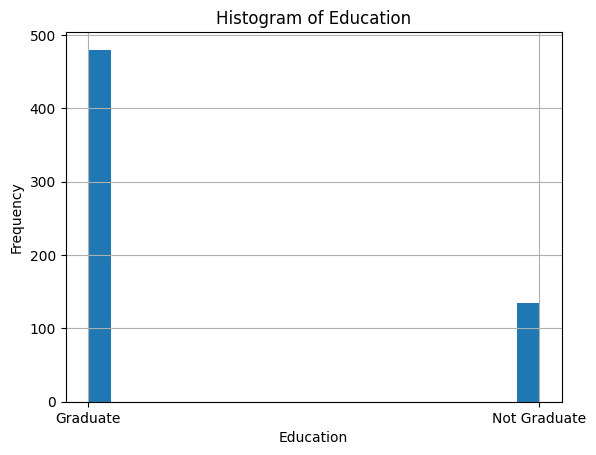

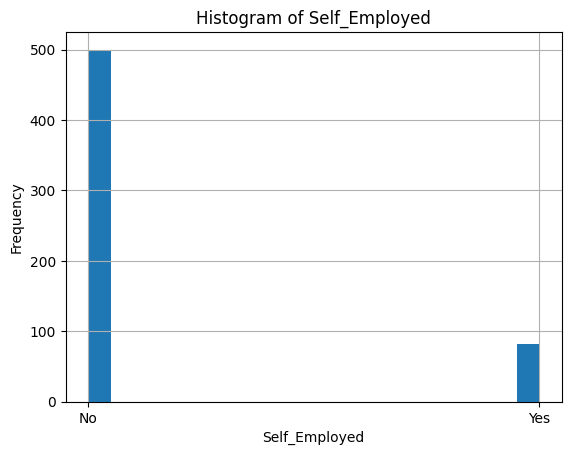

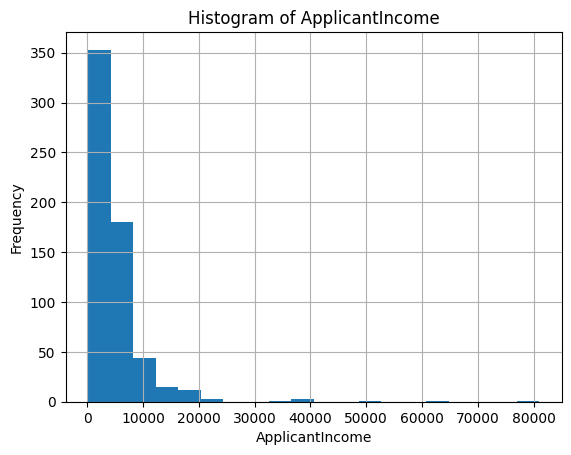

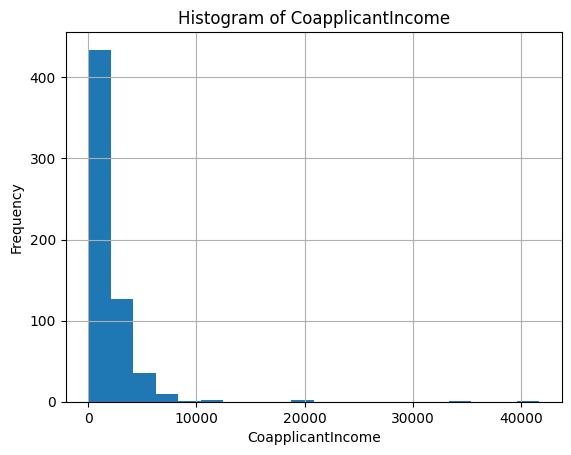

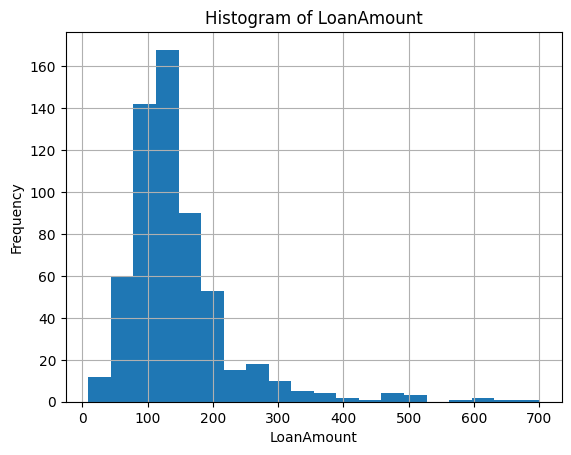

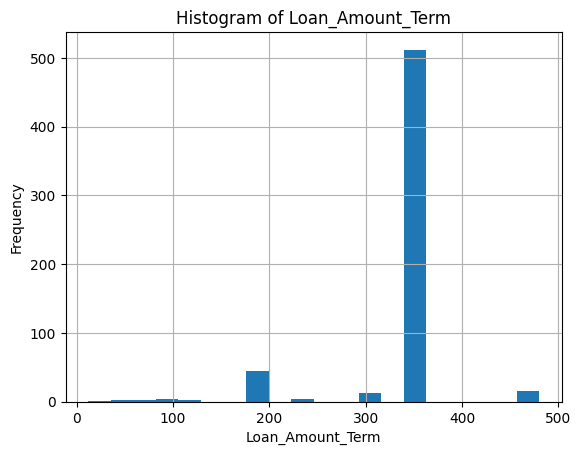

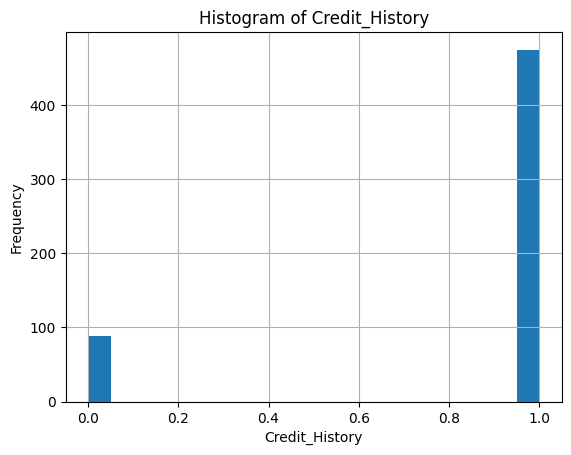

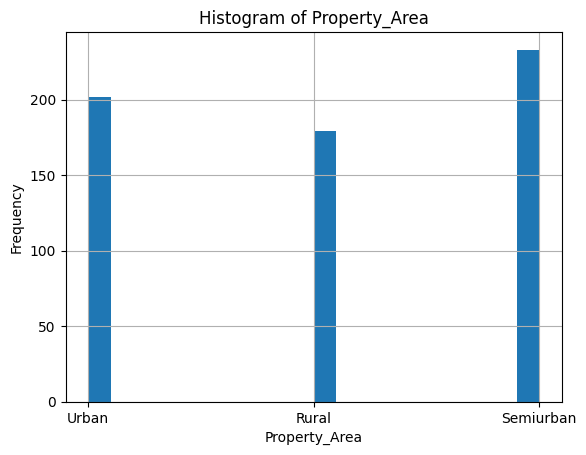

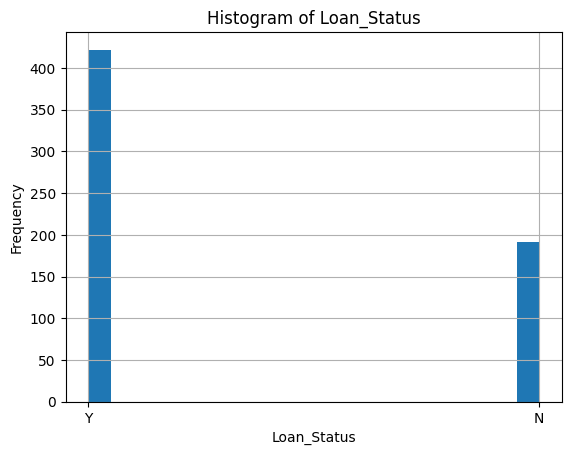

In [26]:
# Plotting Histogram
feature_columns = df.columns
for column in feature_columns:
        plt.figure()
        df[column].hist(bins=20)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

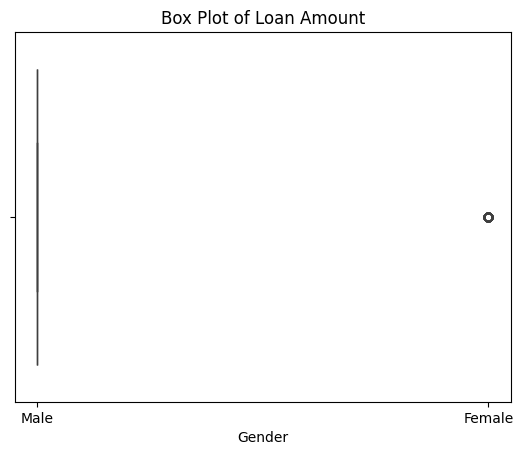

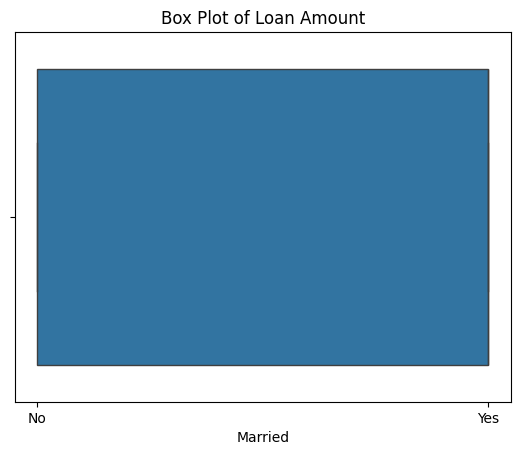

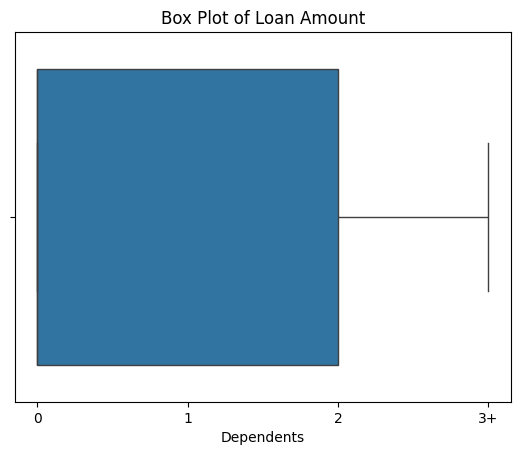

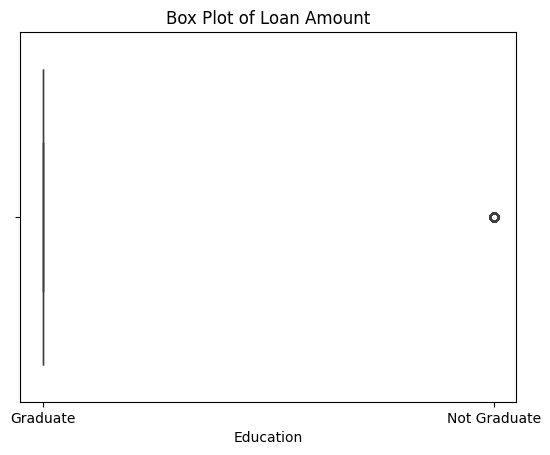

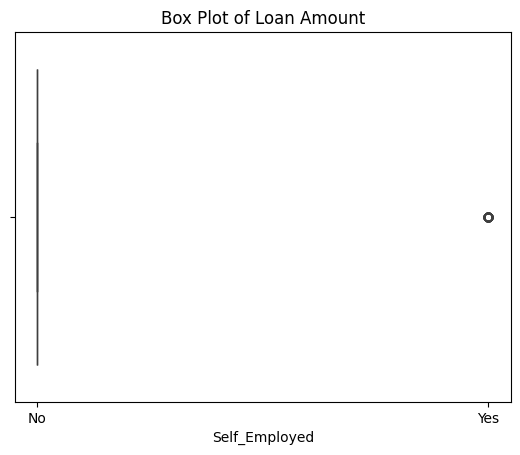

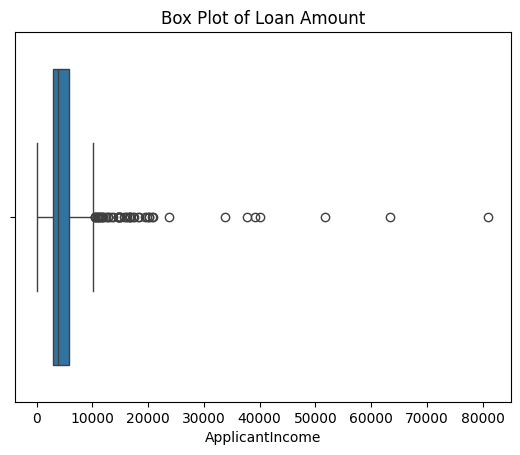

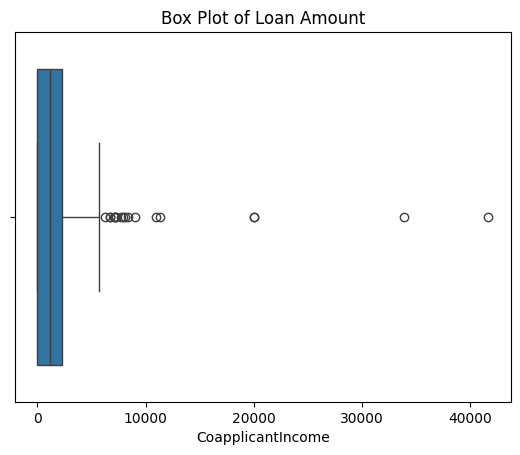

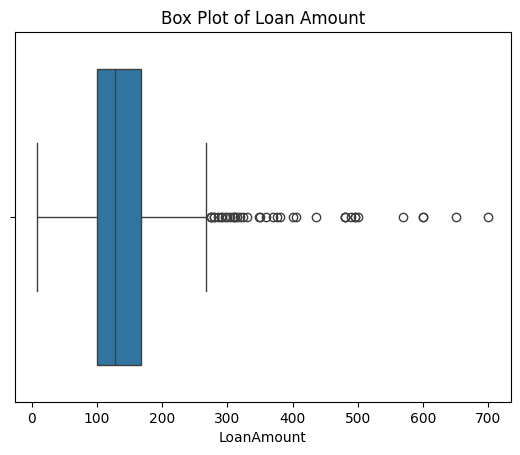

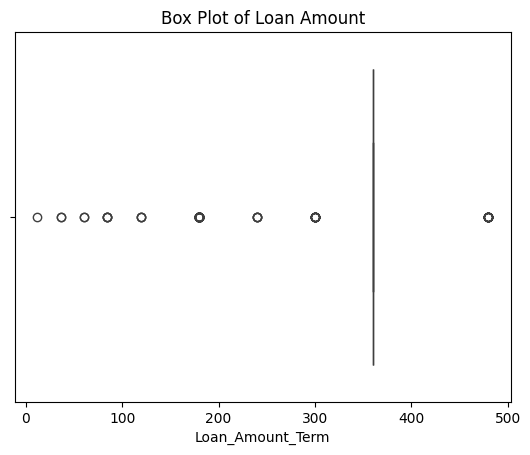

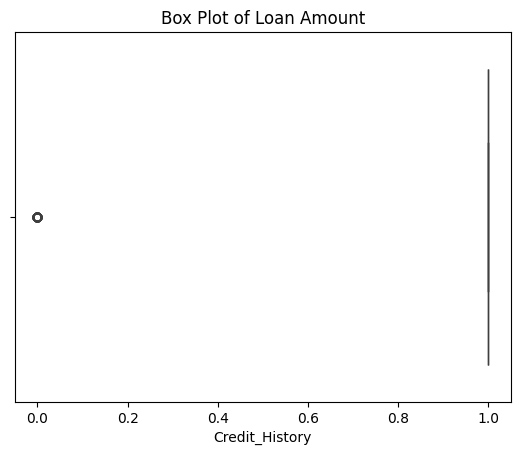

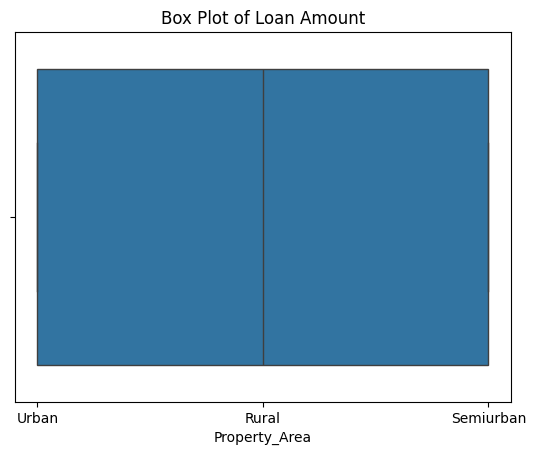

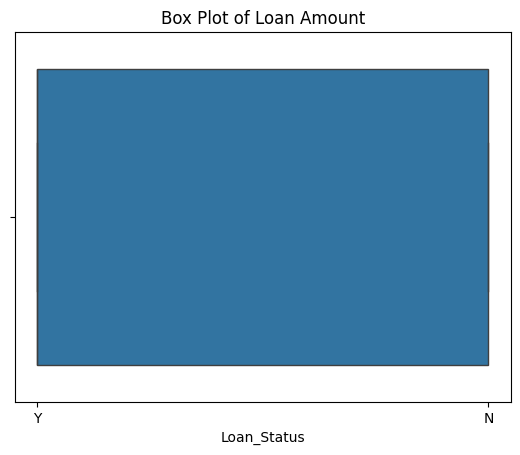

In [27]:
for column in feature_columns:
  sns.boxplot(x=df[column])
  plt.title('Box Plot of Loan Amount')
  plt.xlabel(column)
  plt.show()

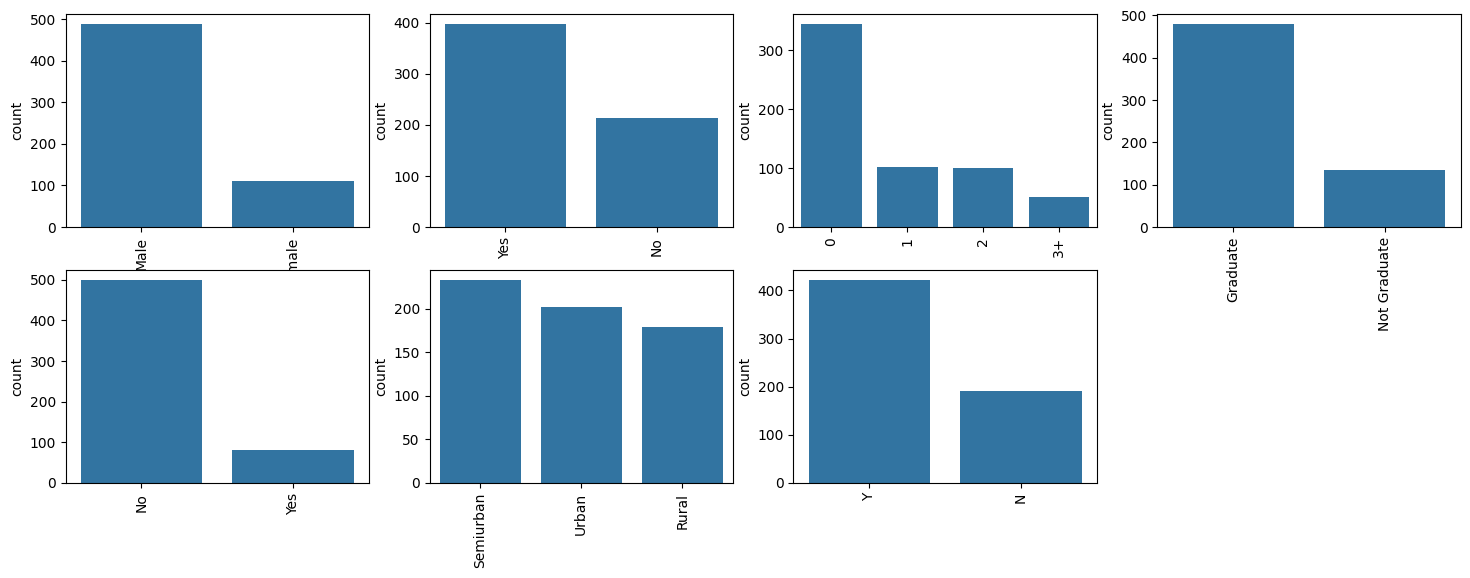

In [28]:
item = (df.dtypes == 'object')
obj_cols = list(item[item].index)
plt.figure(figsize=(18,36))
idx = 1

for col in obj_cols:
  y = df[col].value_counts()
  plt.subplot(11,4, idx)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  idx +=1

In [29]:
LE = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = LE.fit_transform(df[col])


In [30]:
# check for Categorical data type if any left
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

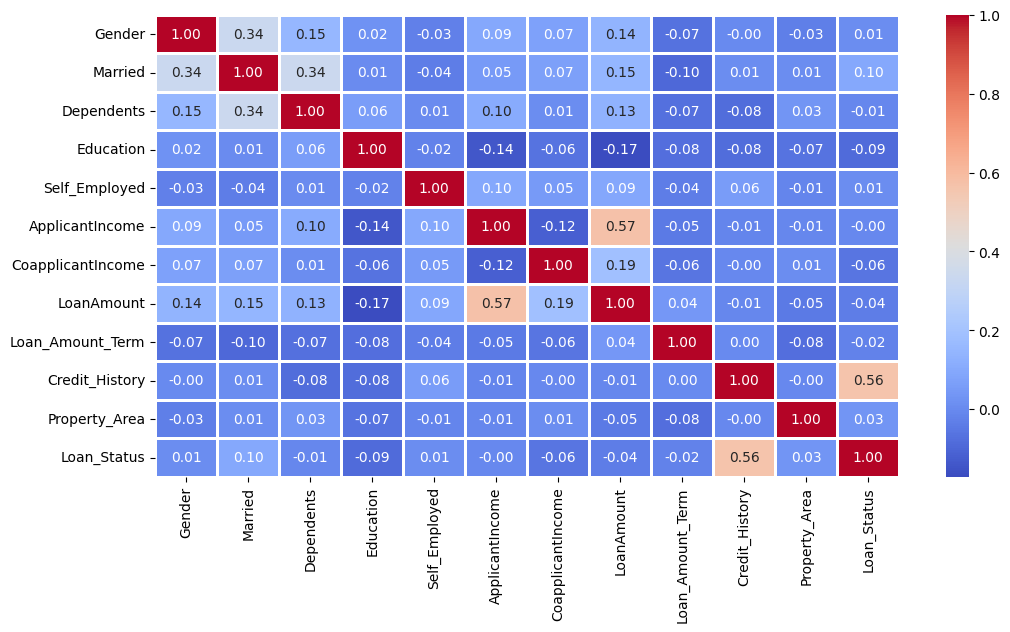

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f', linewidths=2, annot=True)

The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

Now we will use Catplot to visualize the plot for the Gender, and Marital Status of the applicant.

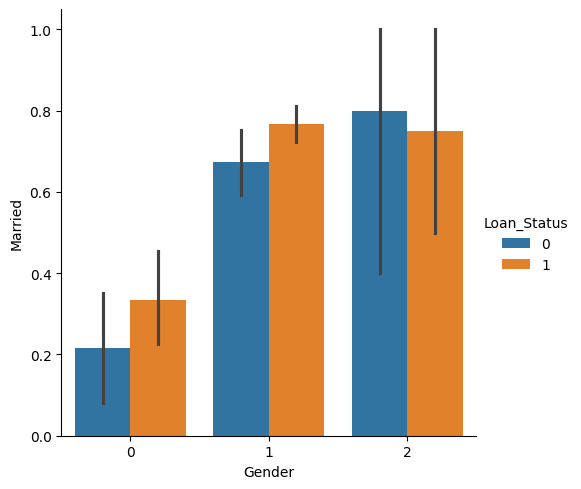

In [32]:
sns.catplot(x="Gender", y="Married", hue="Loan_Status",  kind="bar", data=df)

In [33]:
# check for missing values
for col in df.columns:
  df[col] = df[col].fillna(df[col].mean())
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((368, 11), (246, 11), (368,), (246,))

Training

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression(max_iter=500)

for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    accuracy = metrics.accuracy_score(Y_train, Y_pred)
    precision = metrics.precision_score(Y_train, Y_pred, average='binary', pos_label=1)
    recall = metrics.recall_score(Y_train, Y_pred, average='binary', pos_label=1)
    f1 = metrics.f1_score(Y_train, Y_pred, average='binary', pos_label=1)

    print(f"Classifier: {clf.__class__.__name__}")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-Score: {f1:.2f}")
    print()

Classifier: RandomForestClassifier
  Accuracy: 0.97
  Precision: 0.97
  Recall: 0.99
  F1-Score: 0.98

Classifier: KNeighborsClassifier
  Accuracy: 0.77
  Precision: 0.78
  Recall: 0.93
  F1-Score: 0.85

Classifier: SVC
  Accuracy: 0.70
  Precision: 0.70
  Recall: 1.00
  F1-Score: 0.83

Classifier: LogisticRegression
  Accuracy: 0.83
  Precision: 0.81
  Recall: 0.98
  F1-Score: 0.89



Testing

Results for RandomForestClassifier:
Accuracy: 76.42%
Precision: 76.10%
Recall: 94.55%
F1-Score: 84.32%


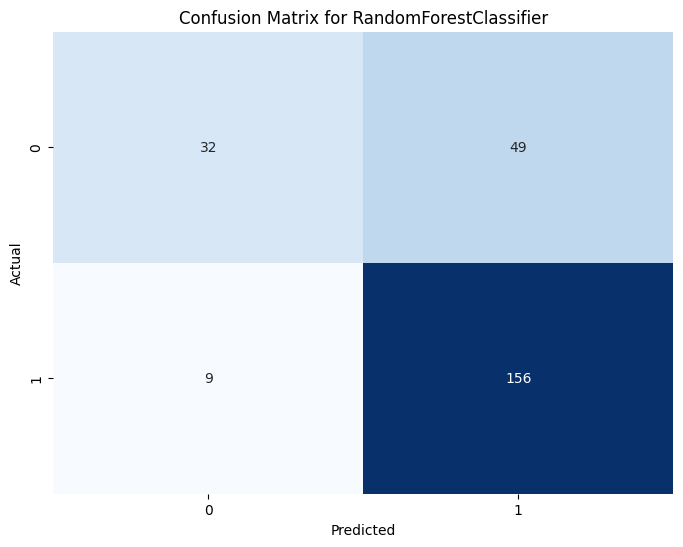

Results for KNeighborsClassifier:
Accuracy: 62.20%
Precision: 67.31%
Recall: 84.85%
F1-Score: 75.07%


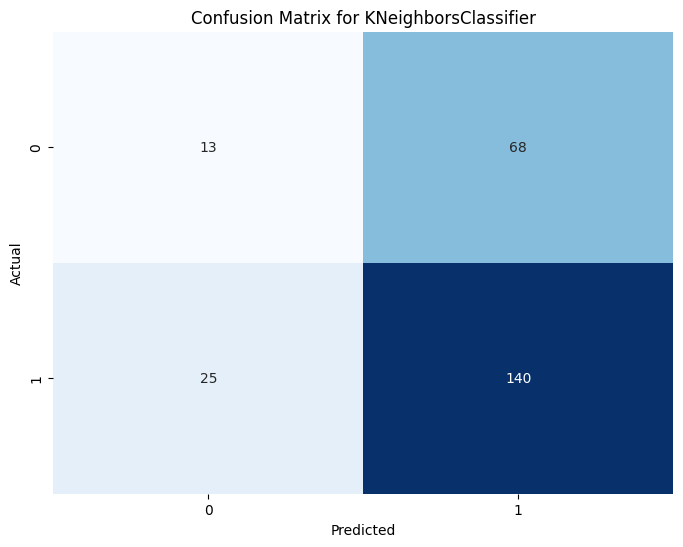

Results for SVC:
Accuracy: 67.07%
Precision: 67.07%
Recall: 100.00%
F1-Score: 80.29%


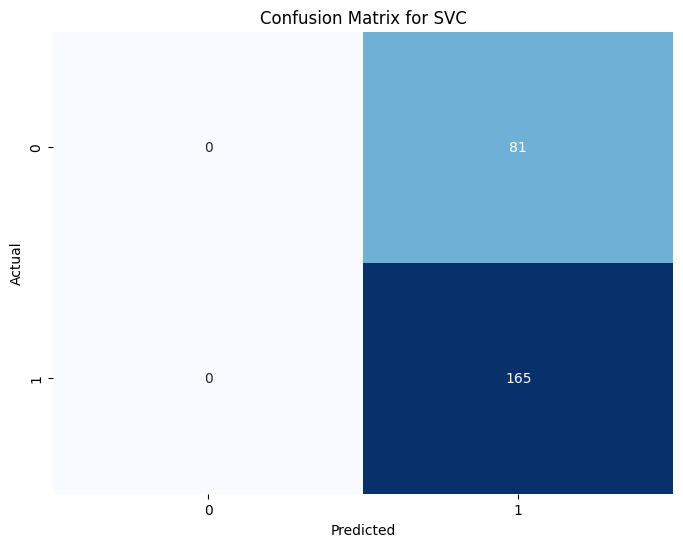

Results for LogisticRegression:
Accuracy: 78.86%
Precision: 76.78%
Recall: 98.18%
F1-Score: 86.17%


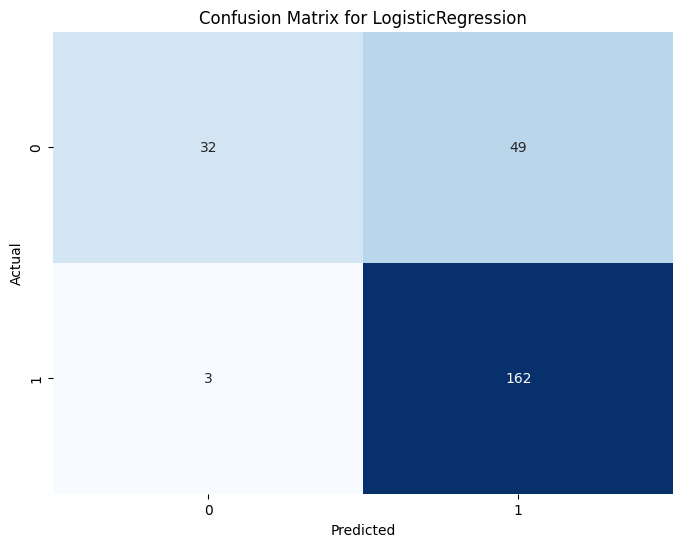

In [36]:
# making predictions on the testing set
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    cm = metrics.confusion_matrix(Y_test, Y_pred)

    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred, average='binary', pos_label=1)
    recall = metrics.recall_score(Y_test, Y_pred, average='binary', pos_label=1)
    f1 = metrics.f1_score(Y_test, Y_pred, average='binary', pos_label=1)

    print(f"Results for {clf.__class__.__name__}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1 * 100:.2f}%")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix for {clf.__class__.__name__}")
    plt.show()

Training and testing with 10-fold cross validation approach

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression(max_iter=500)

classifiers = [rfc, knn, svc, lc]
n_folds = 10

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary', pos_label=1),
    'recall': make_scorer(recall_score, average='binary', pos_label=1),
    'f1': make_scorer(f1_score, average='binary', pos_label=1)
}

for clf in classifiers:
    cv_results = cross_validate(clf, X, Y, cv=n_folds, scoring=scoring, return_train_score=True)

    mean_accuracy_train = np.mean(cv_results['train_accuracy'])
    mean_accuracy_test = np.mean(cv_results['test_accuracy'])
    mean_precision_train = np.mean(cv_results['train_precision'])
    mean_precision_test = np.mean(cv_results['test_precision'])
    mean_recall_train = np.mean(cv_results['train_recall'])
    mean_recall_test = np.mean(cv_results['test_recall'])
    mean_f1_train = np.mean(cv_results['train_f1'])
    mean_f1_test = np.mean(cv_results['test_f1'])

    print(f"Classifier: {clf.__class__.__name__}")
    print(f"  Mean training accuracy: {mean_accuracy_train * 100:.2f}%")
    print(f"  Mean test accuracy: {mean_accuracy_test * 100:.2f}%")
    print(f"  Mean training precision: {mean_precision_train * 100:.2f}%")
    print(f"  Mean test precision: {mean_precision_test * 100:.2f}%")
    print(f"  Mean training recall: {mean_recall_train * 100:.2f}%")
    print(f"  Mean test recall: {mean_recall_test * 100:.2f}%")
    print(f"  Mean training F1-score: {mean_f1_train * 100:.2f}%")
    print(f"  Mean test F1-score: {mean_f1_test * 100:.2f}%")
    print()


Classifier: RandomForestClassifier
  Mean training accuracy: 97.56%
  Mean test accuracy: 75.75%
  Mean training precision: 97.61%
  Mean test precision: 78.72%
  Mean training recall: 98.87%
  Mean test recall: 88.86%
  Mean training F1-score: 98.23%
  Mean test F1-score: 83.44%

Classifier: KNeighborsClassifier
  Mean training accuracy: 78.03%
  Mean test accuracy: 60.59%
  Mean training precision: 80.20%
  Mean test precision: 68.63%
  Mean training recall: 90.34%
  Mean test recall: 78.41%
  Mean training F1-score: 84.97%
  Mean test F1-score: 73.13%

Classifier: SVC
  Mean training accuracy: 69.24%
  Mean test accuracy: 68.57%
  Mean training precision: 69.08%
  Mean test precision: 68.68%
  Mean training recall: 100.00%
  Mean test recall: 99.76%
  Mean training F1-score: 81.71%
  Mean test F1-score: 81.35%

Classifier: LogisticRegression
  Mean training accuracy: 81.14%
  Mean test accuracy: 80.47%
  Mean training precision: 79.42%
  Mean test precision: 79.15%
  Mean training r

In [38]:
# save the model to disk
filename = 'LR.pkl'
pkl.dump(lc, open(filename, 'wb'))